<a href="https://colab.research.google.com/github/SarmSKunatham/DigitalImageProcessing/blob/main/Digi_Image_Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!wget https://drive.google.com/uc?id=1dhh4m9VRLUSmbaHfge2iRSW5Azkpefco  -O kitty3.png
!wget https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL  -O kitty55.png
!wget https://drive.google.com/uc?id=1Jk0cEtQt4HxkLcKlmTHukpb22gJZ4dmL -O noisy_kitty55.png

--2022-10-10 15:33:30--  https://drive.google.com/uc?id=1dhh4m9VRLUSmbaHfge2iRSW5Azkpefco
Resolving drive.google.com (drive.google.com)... 142.251.2.102, 142.251.2.113, 142.251.2.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.2.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nsk5qlfe9qk2daop4r468cgajuji4dnn/1665415950000/10800959494545164832/*/1dhh4m9VRLUSmbaHfge2iRSW5Azkpefco?uuid=8f9d7030-9dc3-4079-9682-3a0363f60ee3 [following]
--2022-10-10 15:33:31--  https://doc-04-2o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nsk5qlfe9qk2daop4r468cgajuji4dnn/1665415950000/10800959494545164832/*/1dhh4m9VRLUSmbaHfge2iRSW5Azkpefco?uuid=8f9d7030-9dc3-4079-9682-3a0363f60ee3
Resolving doc-04-2o-docs.googleusercontent.com (doc-04-2o-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to doc-04-2o

# Visualize image

In [86]:
# import 
import matplotlib.pyplot as plt
import cv2
import numpy as np
from math import sqrt, log10

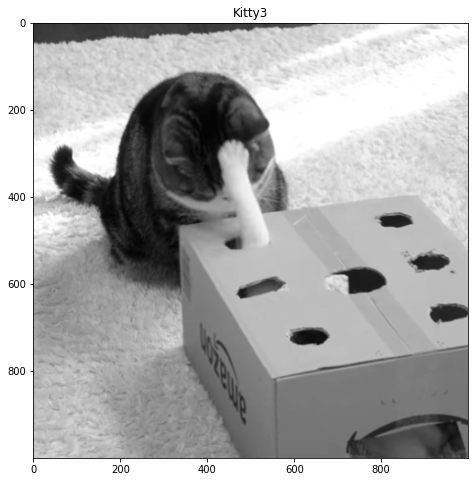

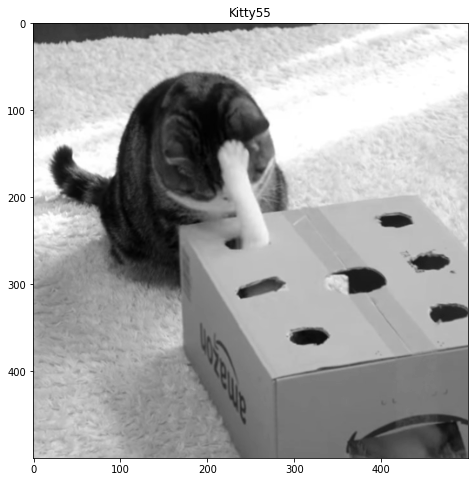

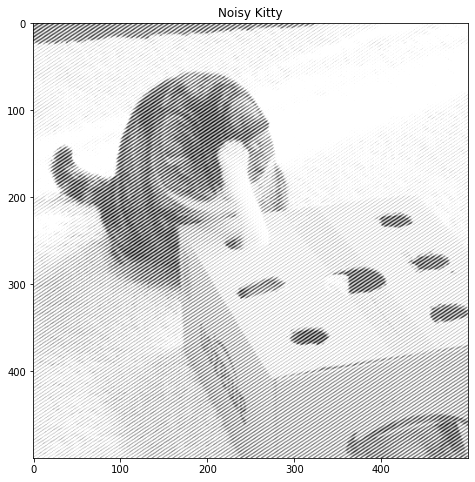

In [37]:
# Check image
img1 = cv2.imread('kitty3.png', 0)
plt.figure(figsize=(12, 8))
plt.imshow(img1, cmap="gray")
plt.title("Kitty3")
plt.show()

img2 = cv2.imread('kitty55.png', 0)
plt.figure(figsize=(12, 8))
plt.imshow(img2, cmap="gray")
plt.title("Kitty55")
plt.show()

img3 = cv2.imread('noisy_kitty55.png', 0)
plt.figure(figsize=(12, 8))
plt.imshow(img3, cmap="gray")
plt.title("Noisy Kitty")
plt.show()

# Q1 : Low pass Gaussian filter

([], <a list of 0 Text major ticklabel objects>)

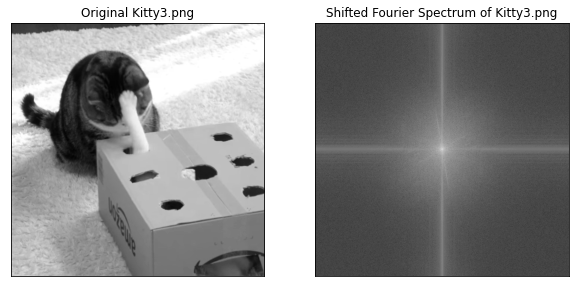

In [79]:
f_img1 = np.fft.fft2(img1)
fshift_img1 = np.fft.fftshift(f_img1)
ms_img1 = np.log(1 + np.abs(fshift_img1))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1); plt.imshow(img1, cmap="gray"); plt.title("Original Kitty3.png"); plt.xticks([]); plt.yticks([])
plt.subplot(1, 2, 2); plt.imshow(ms_img1.astype("uint8"), cmap="gray"); plt.title("Shifted Fourier Spectrum of Kitty3.png"); plt.xticks([]); plt.yticks([])

## Filter with Gaussian Low Pass Filter

$H(u, v) = e^{-D^2(u,v)/2D_0^2}$

D(u, v): Distance from Fourier origin

D0: Cutoff frequency

**Total image power** : $P_T = \sum_{u=0}^n \sum_{v=0}^n P(u,v)$

power spectrum : $P(u,v) = {|F(u, v)|}^2$

In [63]:
# inverse fourier to spatial
def imgback(fshift):
  ifshift = np.fft.ifftshift(fshift)
  g = np.fft.ifft2(ifshift)
  return g.astype("uint8")

# Total image power
def totalImagePower(F):
  total_power = 0
  for u in range(F.shape[0]):
    for v in range(F.shape[1]):
      total_power += np.power(np.abs(F[u, v]), 2)
  return total_power

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """


Total Power spectrum from FT: 3.047662733300197e+16
Total Power spectrum after filter: 2.9604855199385464e+16
Alpha : 97.13953868946484


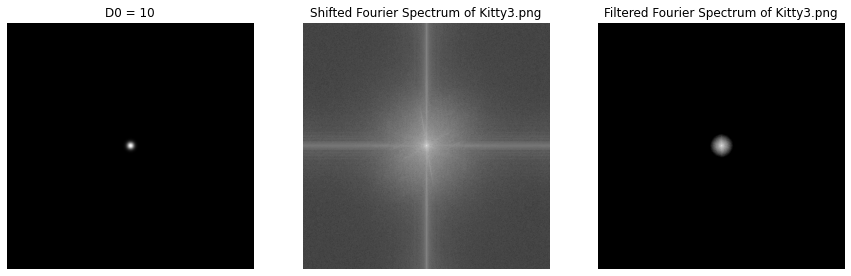

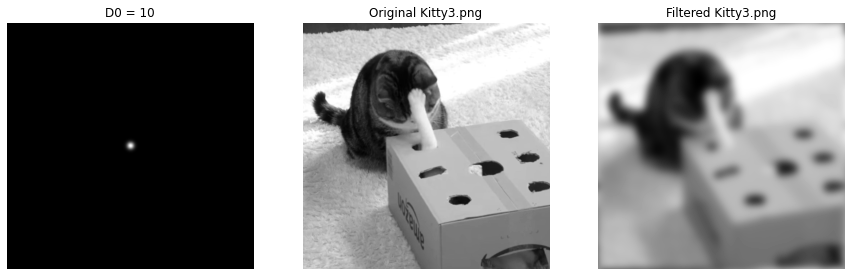

In [83]:
# Shape of f
M, N = f_img1.shape

# Cutoff frequency
D0 = 10

# Filter template
H = np.zeros((M, N), dtype="float32")

# Create guassian lpf
for u in range(M):
  for v in range(N):
    # Distance from the fourier origin at the center
    D = np.sqrt(np.power((u - M/2), 2) + np.power((v - N/2), 2))
    H[u, v] = np.exp(-(np.power(D, 2) / (2 * np.power(D0, 2))))

# filter
img1_ft_filter = fshift_img1 * H
img1_ft_filter_spectrum = np.log(1 + np.abs(img1_ft_filter))

# Inverse back to image
img1_g = imgback(img1_ft_filter)

# Total image power
tip_img1_ft = totalImagePower(f_img1)
tip_img1_ft_filter = totalImagePower(img1_ft_filter)

alpha_img1 = 100 * (tip_img1_ft_filter / tip_img1_ft)

print(f"Total Power spectrum from FT: {tip_img1_ft}")
print(f"Total Power spectrum after filter: {tip_img1_ft_filter}")
print(f"Alpha : {alpha_img1}")

plt.figure(figsize=(15, 20))
plt.subplot(1, 3, 1)
plt.imshow(H, cmap="gray")
plt.title(f"D0 = {D0}")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(ms_img1.astype("uint8"), cmap="gray")
plt.title("Shifted Fourier Spectrum of Kitty3.png")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(img1_ft_filter_spectrum.astype("uint8"), cmap="gray")
plt.title("Filtered Fourier Spectrum of Kitty3.png")
plt.axis("off")
plt.show()

plt.figure(figsize=(15, 20))
plt.subplot(1, 3, 1)
plt.imshow(H, cmap="gray")
plt.title(f"D0 = {D0}")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(img1, cmap="gray")
plt.title("Original Kitty3.png")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(img1_g, cmap="gray")
plt.title("Filtered Kitty3.png")
plt.axis("off")
plt.show()

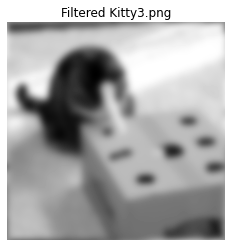

In [85]:
plt.imshow(img1_g, cmap="gray")
plt.title("Filtered Kitty3.png")
plt.axis("off")
plt.show()

# Q2 Remove periodic noise and calculate PSNR

In [87]:
def PSNR(original, newImage):
  mse = np.mean((original - newImage) ** 2)
  if (mse == 0):
    return 100 
  max_pixel = np.max(original) 
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr 

In [161]:
def apply_filter(fshift, points, d0):
        m = fshift.shape[0]
        n = fshift.shape[1]
        for u in range(m):
            for v in range(n):
                for d in range(len(points)):
                    u0 = points[d][0]
                    v0 = points[d][1]
                    u0, v0 = v0, u0
                    d1 = np.power(np.power(u - u0, 2) + np.power(v - v0, 2), 1)
                    if d1 <= d0:
                        fshift[u][v] *= 0.0
        f_ishift = np.fft.ifftshift(fshift)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)
        return img_back

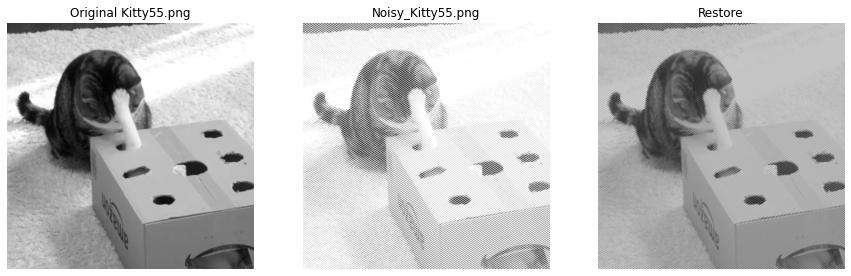

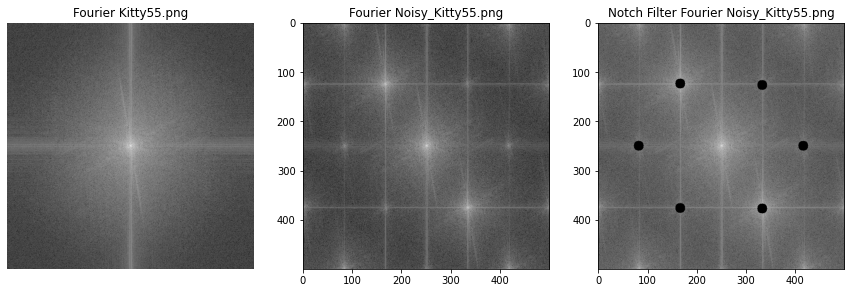

PSNR Original: 100
PSNR Noisy: 28.777556580091797
PSNR Restored: 17.889557345279684


In [168]:

# fourier
ft_img2 = np.fft.fft2(img2)
shift_ft_img2 = np.fft.fftshift(ft_img2)
ms_shift_ft_img2 = np.log(1 + np.abs(shift_ft_img2))
ft_img3 = np.fft.fft2(img3) 
shift_ft_img3 = np.fft.fftshift(ft_img3)
ms_shift_ft_img3 = np.log(1 + np.abs(shift_ft_img3))

#notch filter
im_notch = shift_ft_img3.copy()
points = [[166, 124],
          [332, 127],
          [166, 376],
          [332, 377],
          [82, 250],
          [415, 250]]

img_restored = apply_filter(im_notch, points, 100)
img_ft_filter_nf_spectrum = np.log(1+np.abs(im_notch))
img_restored  = (img_restored - img_restored.min()) / (img_restored.max()-img_restored.min()) * 255 

plt.figure(figsize=(15, 20))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap="gray")
plt.title("Original Kitty55.png")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(img3, cmap="gray")
plt.title("Noisy_Kitty55.png")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(img_restored, cmap="gray")
plt.title("Restore")
plt.axis("off")
plt.show()


plt.figure(figsize=(15, 20))
plt.subplot(1, 3, 1)
plt.imshow(ms_shift_ft_img2.astype("uint8"), cmap="gray")
plt.title("Fourier Kitty55.png")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(ms_shift_ft_img3.astype("uint8"), cmap="gray")
plt.title("Fourier Noisy_Kitty55.png")
plt.subplot(1, 3, 3)
plt.imshow(img_ft_filter_nf_spectrum.astype("uint8"), cmap="gray")
plt.title("Notch Filter Fourier Noisy_Kitty55.png")
plt.show()

print(f"PSNR Original: {PSNR(img2, img2)}")
print(f"PSNR Noisy: {PSNR(img3, img2)}")
print(f"PSNR Restored: {PSNR(img_restored, img2)}")
